============membership============ {2: [0, 1, 3, 5, 6, 9, 11, 15, 16, 19, 23, 24, 27, 28, 39, 42, 43, 46, 48, 49, 51, 52, 54, 60, 64, 71, 72, 74, 77, 79, 85, 86, 95, 96, 98, 102, 103, 114, 115, 125, 126, 127, 128, 129, 132, 136, 138, 140, 141, 142, 144, 151, 154, 156, 157, 158, 161, 165, 167, 169, 176, 179, 180, 184, 187, 193, 196, 197, 199, 205, 212, 213, 218, 220, 221, 223, 225, 226, 227, 228, 231, 233, 234, 235, 240, 244, 245, 248, 255, 258, 260, 262, 264, 265, 273, 278, 285, 288, 298, 301, 302, 303, 307, 312, 313, 317, 318, 325, 328, 330, 331, 332, 333, 335, 336, 337, 344, 349], 1: [2, 10, 12, 13, 14, 18, 20, 21, 26, 33, 35, 37, 38, 40, 41, 44, 47, 55, 63, 69, 73, 80, 82, 83, 84, 87, 90, 94, 97, 101, 104, 105, 107, 108, 110, 111, 112, 113, 118, 120, 121, 123, 130, 131, 133, 134, 137, 147, 148, 149, 160, 164, 166, 168, 174, 178, 182, 183, 185, 186, 189, 192, 194, 200, 201, 206, 208, 209, 210, 215, 216, 219, 222, 224, 229, 230, 232, 236, 237, 241, 243, 246, 254, 256, 267, 269, 270, 2

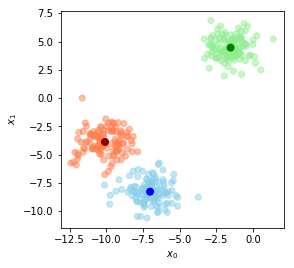

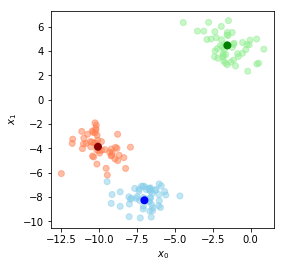

In [3]:
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import math
from sklearn.cluster import KMeans
from dunn_index import compute_dunn_index

# Function for calculating the distance between centroids
def get_distance(centroid, point):
    """Returns the distance the centroid is from each data point in points."""
    distance = 0
    for i in range(len(point)):
        distance += math.pow((centroid[i] - point[i]), 2)
    return math.sqrt(distance)


def generate_train_test_dataset():
    # Generate dataset
    X, y = make_blobs(centers=3, n_samples=500, random_state=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    return X_train, y_train, X_test, y_test


def visualize_data(X):
    # Visualize
    fig, ax = plt.subplots(figsize=(4, 4))
    ax.scatter(X[:, 0], X[:, 1], alpha=0.5)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')


def plot_result(X, centroids, classes):
    group_colors = ['skyblue', 'coral', 'lightgreen']
    colors = [group_colors[j] for j in classes]

    fig, ax = plt.subplots(figsize=(4, 4))
    ax.scatter(X[:, 0], X[:, 1], color=colors, alpha=0.5)
    ax.scatter(centroids[:, 0], centroids[:, 1], color=['blue', 'darkred', 'green'], marker='o', lw=2)
    ax.set_xlabel('$x_0$')
    ax.set_ylabel('$x_1$');


def train(x_train, k):
    kmeans = KMeans(n_clusters=k, random_state=1, init='random')
    kmeans.fit(x_train)
    return kmeans


def predict(kmeans, data):
    result=kmeans.predict(data)
    return result

x_train, y_train, x_test, y_test=generate_train_test_dataset()
k=3
kmeans=train(x_train, k)
y_train_hat=predict(kmeans, x_train)
y_test_hat=predict(kmeans, x_test)

di=compute_dunn_index(get_distance, y_train_hat,x_train, kmeans.cluster_centers_)
""" kalau lebih besar lebih bagus, > 1 sudah hampir tidak ada overlap, dibawah 1 cluster mengalami overlap"""
print('dunn index',di)

plot_result(x_train, kmeans.cluster_centers_, y_train_hat)
plot_result(x_test, kmeans.cluster_centers_, y_test_hat)

plt.show()